Use scaling , apply class weights with XGB

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r'Telco_customer_churn.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
df.describe(include='O')

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Label,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.0,7043,1869
unique,7043,1,1,1129,1652,2,2,2,2,2,...,3,3,3,3,3,2,4,6531.0,2,20
top,3668-QPYBK,United States,California,Los Angeles,"33.964131, -118.272783",Male,No,No,No,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No,Attitude of support person
freq,1,7043,7043,305,5,3555,5901,3641,5416,6361,...,3095,3473,2810,2785,3875,4171,2365,11.0,5174,192


In [7]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [8]:
df.isna().sum().sort_values()

CustomerID              0
Churn Score             0
Churn Value             0
Churn Label             0
Total Charges           0
Monthly Charges         0
Payment Method          0
Paperless Billing       0
Contract                0
Streaming Movies        0
Streaming TV            0
Tech Support            0
Device Protection       0
Online Backup           0
Online Security         0
CLTV                    0
Internet Service        0
Phone Service           0
Tenure Months           0
Dependents              0
Partner                 0
Senior Citizen          0
Gender                  0
Longitude               0
Latitude                0
Lat Long                0
Zip Code                0
City                    0
State                   0
Country                 0
Count                   0
Multiple Lines          0
Churn Reason         5174
dtype: int64

In [9]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'],errors='coerce')

In [10]:
df['Total Charges'].isnull().sum()

11

In [11]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [12]:
df[df['Total Charges'].isna()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


In [13]:
df = df[df['Total Charges'].notna()]

In [14]:
df.shape

(7032, 33)

<Axes: xlabel='City'>

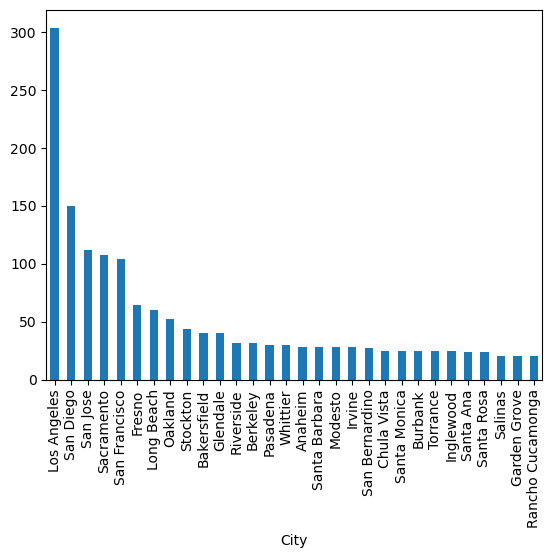

In [15]:
#sns.barplot()
df.groupby(['City'])['Churn Value'].count().sort_values(ascending=False).head(30).plot(kind='bar')


<Axes: xlabel='City'>

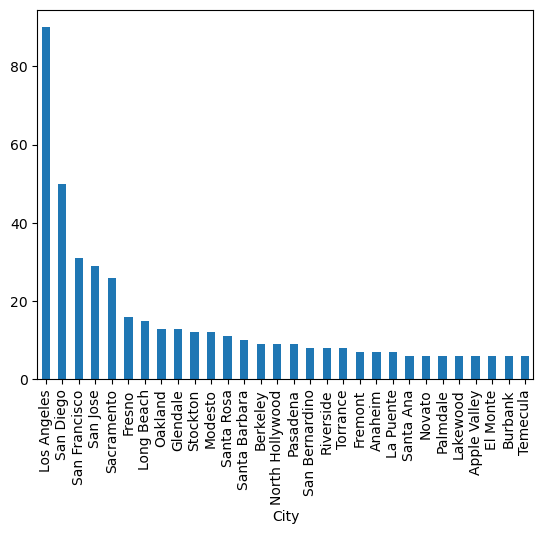

In [16]:
df.groupby(['City'])['Churn Value'].sum().sort_values(ascending=False).head(30).plot(kind='bar')

<Axes: xlabel='City'>

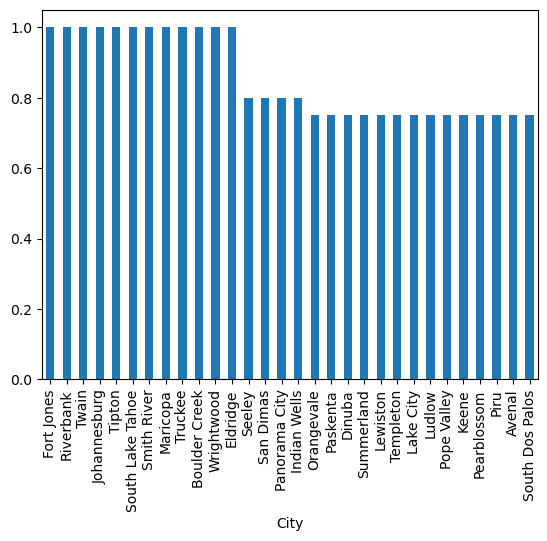

In [17]:
#pd.set_option('display.max_rows', None)

(df.groupby(['City'])['Churn Value'].sum()/df.groupby(['City'])['Churn Value'].count()).sort_values(ascending=False).head(30).plot(kind='bar')

In [18]:
df.groupby('Churn Label')['Tenure Months'].median()

Churn Label
No     38.0
Yes    10.0
Name: Tenure Months, dtype: float64

In [19]:
df.groupby('Churn Label')['Tenure Months'].quantile([.50,.75,.90,.95])


Churn Label      
No           0.50    38.0
             0.75    61.0
             0.90    71.0
             0.95    72.0
Yes          0.50    10.0
             0.75    29.0
             0.90    51.0
             0.95    60.0
Name: Tenure Months, dtype: float64

BOXPLOt

<Axes: xlabel='Churn Reason'>

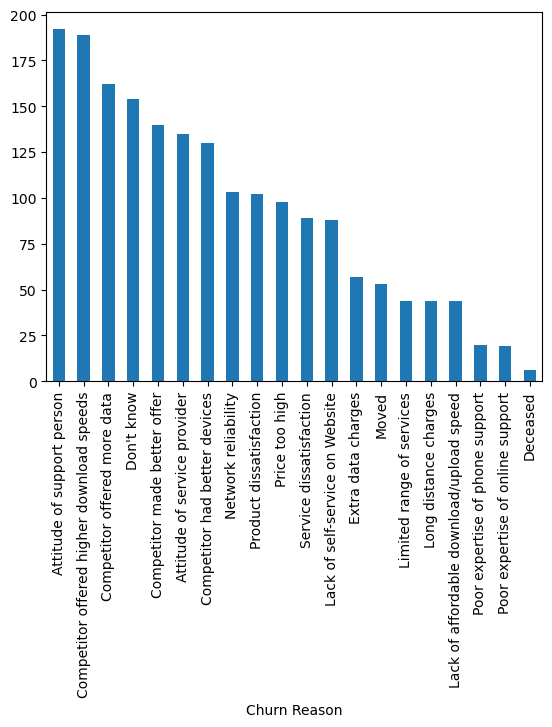

In [20]:
df['Churn Reason'].value_counts().sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='Contract'>

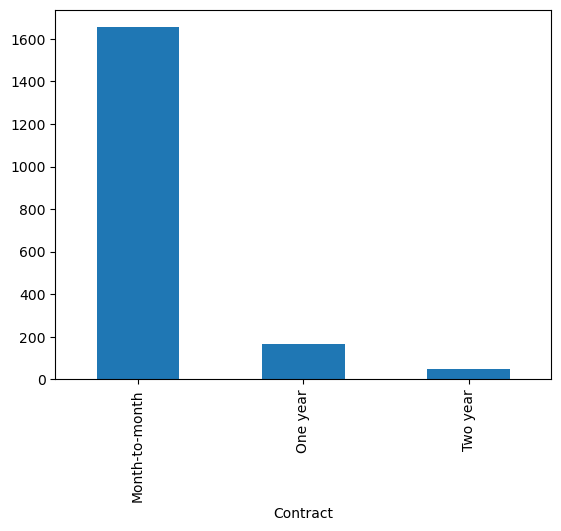

In [21]:
df.groupby(['Contract'])['Churn Value'].sum().sort_values(ascending=False).head(30).plot(kind='bar')

<Axes: xlabel='Total Charges', ylabel='Count'>

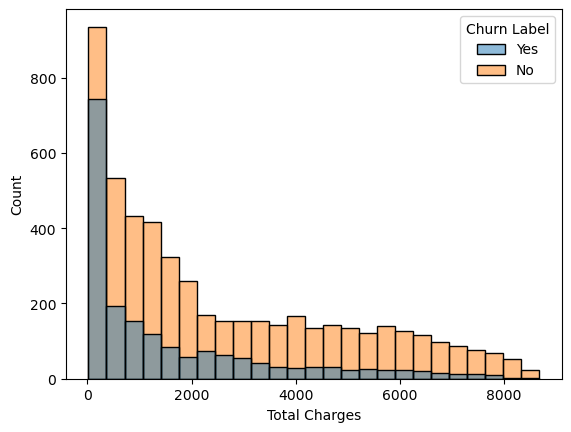

In [22]:
sns.histplot(data= df,x = 'Total Charges',hue='Churn Label')

<Axes: xlabel='Monthly Charges', ylabel='Count'>

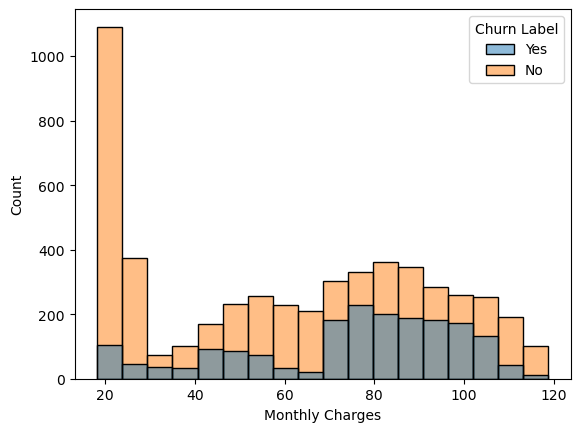

In [23]:
sns.histplot(data= df,x = 'Monthly Charges',hue='Churn Label')

In [24]:
df.groupby('Churn Label')['Monthly Charges'].median()

Churn Label
No     64.45
Yes    79.65
Name: Monthly Charges, dtype: float64

<Axes: xlabel='Internet Service', ylabel='count'>

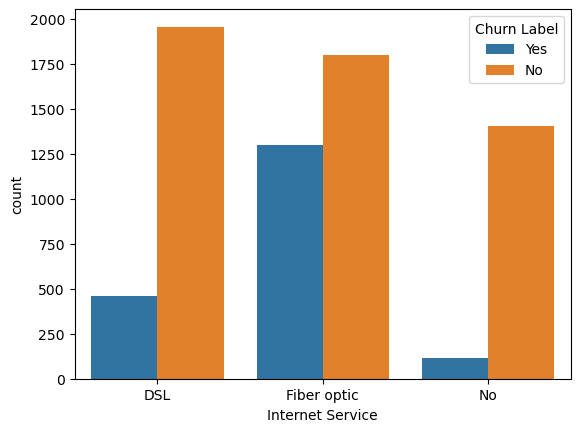

In [25]:
sns.countplot(data= df,x = 'Internet Service',hue='Churn Label')

In [26]:
df.select_dtypes(include='object').columns

Index(['CustomerID', 'Country', 'State', 'City', 'Lat Long', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Churn Label', 'Churn Reason'],
      dtype='object')

<Axes: xlabel='Tech Support', ylabel='count'>

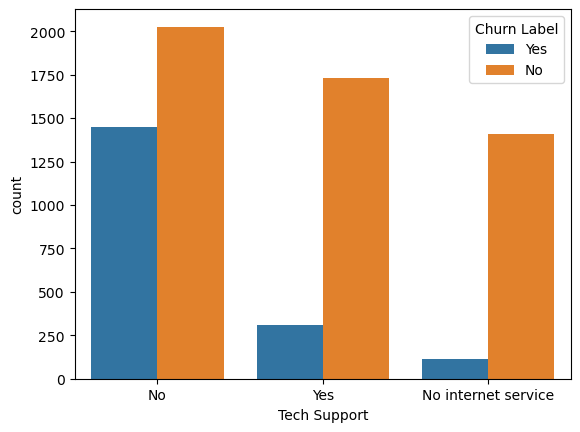

In [27]:
sns.countplot(data= df,x = 'Tech Support',hue='Churn Label')

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Mailed check'),
  Text(1, 0, 'Electronic check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

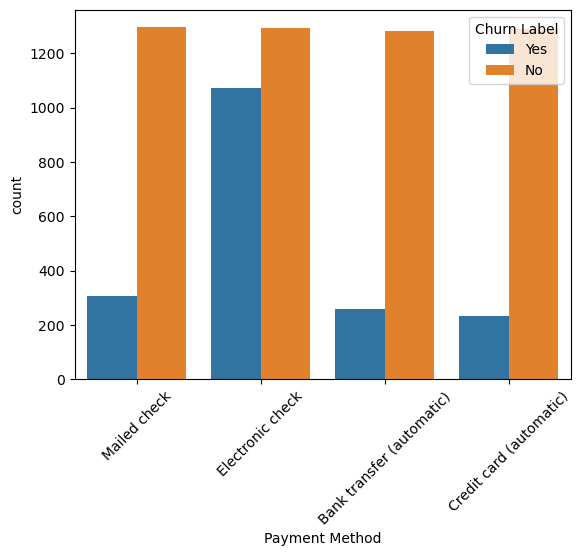

In [28]:
sns.countplot(data= df,x = 'Payment Method',hue='Churn Label')
plt.xticks(rotation=45)


<Axes: xlabel='Senior Citizen', ylabel='count'>

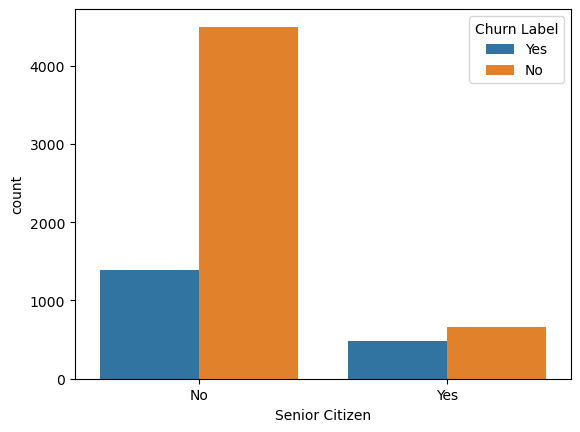

In [29]:
sns.countplot(data= df,x = 'Senior Citizen',hue='Churn Label')

<Axes: xlabel='Dependents', ylabel='count'>

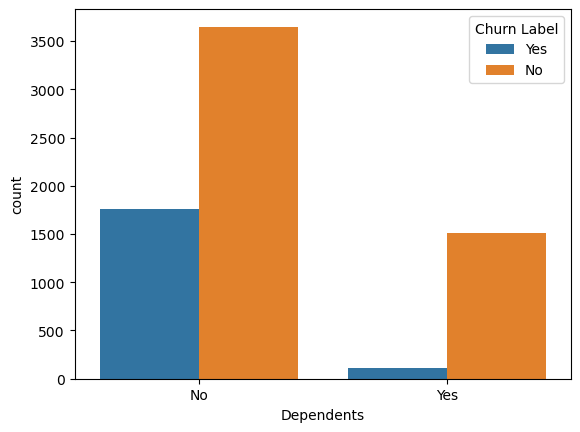

In [30]:
sns.countplot(data= df,x = 'Dependents',hue='Churn Label')

In [31]:
df = df.drop(['City','Country','State','Count','Zip Code','Churn Reason','Churn Score','Churn Label','CLTV','CustomerID','Lat Long','Latitude','Longitude'], axis = 1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7032 non-null   object 
 1   Senior Citizen     7032 non-null   object 
 2   Partner            7032 non-null   object 
 3   Dependents         7032 non-null   object 
 4   Tenure Months      7032 non-null   int64  
 5   Phone Service      7032 non-null   object 
 6   Multiple Lines     7032 non-null   object 
 7   Internet Service   7032 non-null   object 
 8   Online Security    7032 non-null   object 
 9   Online Backup      7032 non-null   object 
 10  Device Protection  7032 non-null   object 
 11  Tech Support       7032 non-null   object 
 12  Streaming TV       7032 non-null   object 
 13  Streaming Movies   7032 non-null   object 
 14  Contract           7032 non-null   object 
 15  Paperless Billing  7032 non-null   object 
 16  Payment Method     7032 non-n

In [33]:
df_dummies = pd.get_dummies(df)

In [34]:
df_dummies

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
1,2,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
2,8,99.65,820.50,1,True,False,True,False,True,False,...,True,True,False,False,False,True,False,False,True,False
3,28,104.80,3046.05,1,True,False,True,False,False,True,...,True,True,False,False,False,True,False,False,True,False
4,49,103.70,5036.30,1,False,True,True,False,True,False,...,True,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,21.15,1419.40,0,True,False,True,False,True,False,...,False,False,False,True,False,True,True,False,False,False
7039,24,84.80,1990.50,0,False,True,True,False,False,True,...,True,False,True,False,False,True,False,False,False,True
7040,72,103.20,7362.90,0,True,False,True,False,False,True,...,True,False,True,False,False,True,False,True,False,False
7041,11,29.60,346.45,0,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False


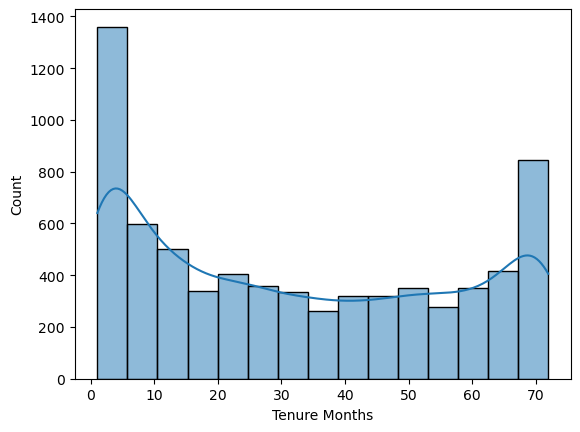

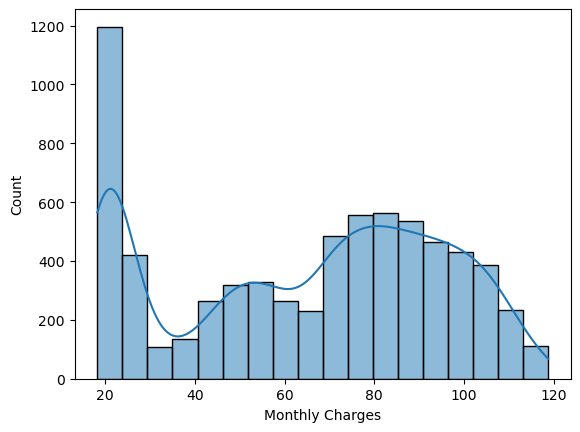

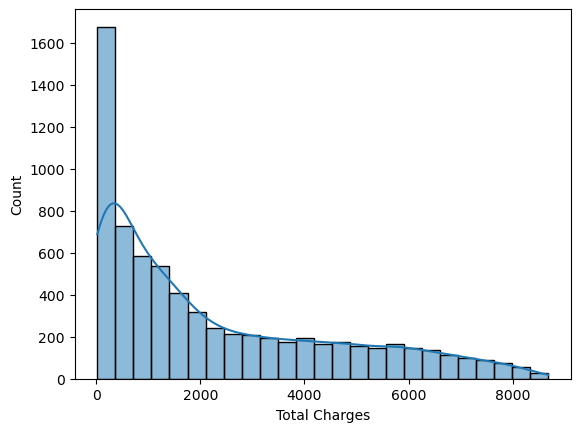

In [35]:
sns.histplot(df['Tenure Months'],kde=True)
plt.show()

sns.histplot(df['Monthly Charges'],kde=True)
plt.show()

sns.histplot(df['Total Charges'],kde=True)
plt.show()

In [36]:
df_dummies['Churn Value'].value_counts()

Churn Value
0    5163
1    1869
Name: count, dtype: int64

In [37]:
df_dummies['Tenure Months'] = pd.qcut(df_dummies['Tenure Months'],q=4,labels=[1,2,3,4])
df_dummies['Monthly Charges'] = pd.qcut(df_dummies['Monthly Charges'],q=3,labels=[1,2,3])
df_dummies['Total Charges'] = pd.qcut(df_dummies['Total Charges'],q=3,labels=[1,2,3])

In [38]:
df_dummies['Tenure Months'] = pd.to_numeric(df_dummies['Tenure Months'])
df_dummies['Monthly Charges'] = pd.to_numeric(df_dummies['Monthly Charges'])
df_dummies['Total Charges'] = pd.to_numeric(df_dummies['Total Charges'])

In [39]:
df_dummies

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,2,1,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
1,1,2,1,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
2,1,3,2,1,True,False,True,False,True,False,...,True,True,False,False,False,True,False,False,True,False
3,2,3,3,1,True,False,True,False,False,True,...,True,True,False,False,False,True,False,False,True,False
4,3,3,3,1,False,True,True,False,True,False,...,True,True,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4,1,2,0,True,False,True,False,True,False,...,False,False,False,True,False,True,True,False,False,False
7039,2,3,2,0,False,True,True,False,False,True,...,True,False,True,False,False,True,False,False,False,True
7040,4,3,3,0,True,False,True,False,False,True,...,True,False,True,False,False,True,False,True,False,False
7041,2,1,1,0,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False


In [40]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Tenure Months                             7032 non-null   int64
 1   Monthly Charges                           7032 non-null   int64
 2   Total Charges                             7032 non-null   int64
 3   Churn Value                               7032 non-null   int64
 4   Gender_Female                             7032 non-null   bool 
 5   Gender_Male                               7032 non-null   bool 
 6   Senior Citizen_No                         7032 non-null   bool 
 7   Senior Citizen_Yes                        7032 non-null   bool 
 8   Partner_No                                7032 non-null   bool 
 9   Partner_Yes                               7032 non-null   bool 
 10  Dependents_No                             7032 non-null   bool 
 

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=42)

X = df_dummies.drop('Churn Value',axis=1)
y = df_dummies['Churn Value']

X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42,stratify=y_res)


In [42]:
df_dummies.isna().sum()

Tenure Months                               0
Monthly Charges                             0
Total Charges                               0
Churn Value                                 0
Gender_Female                               0
Gender_Male                                 0
Senior Citizen_No                           0
Senior Citizen_Yes                          0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
Phone Service_No                            0
Phone Service_Yes                           0
Multiple Lines_No                           0
Multiple Lines_No phone service             0
Multiple Lines_Yes                          0
Internet Service_DSL                        0
Internet Service_Fiber optic                0
Internet Service_No                         0
Online Security_No                          0
Online Security_No internet servic

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

clf = LogisticRegression(random_state=42,max_iter=1000)
clf.fit(X_train, y_train)

print('Train_score = ', accuracy_score(y_train,clf.predict(X_train)))
print('test_score = ', accuracy_score(y_test,clf.predict(X_test)))
cm = confusion_matrix(y_test,clf.predict(X_test))
print(cm) 
print(classification_report(y_test,clf.predict(X_test)))

Train_score =  0.8557000553403431
test_score =  0.8508715300193673
[[1294  255]
 [ 207 1342]]
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1549
           1       0.84      0.87      0.85      1549

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



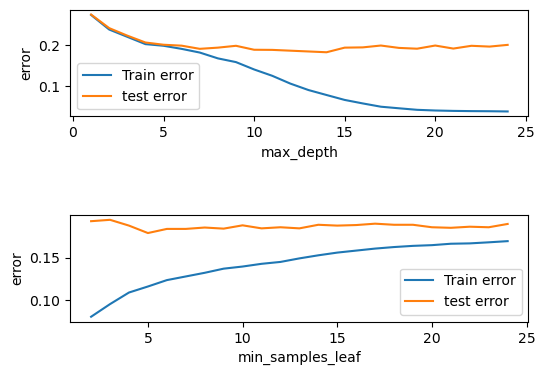

In [44]:
from sklearn.tree import DecisionTreeClassifier


fig, axes = plt.subplots(2, 1)
fig.tight_layout()
fig.tight_layout(pad=5.0)


train_error = []
test_error = []

  
max_depth = np.arange(1,25)
for max_d in max_depth:
  tree_clf = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  tree_clf.fit(X_train,y_train)
  train_error.append(1-accuracy_score(y_train,tree_clf.predict(X_train)))
  test_error.append(1-accuracy_score(y_test,tree_clf.predict(X_test)))

plt.subplot(2,1,1)
plt.plot(max_depth, train_error, label='Train error')
plt.plot(max_depth, test_error, label='test error')
plt.xlabel('max_depth')
plt.ylabel('error')
plt.legend(loc='best')


train_error = []
test_error = []

  
min_s = np.arange(2,25)
for s in min_s:
  tree_clf = DecisionTreeClassifier(min_samples_leaf=s, random_state=42)
  tree_clf.fit(X_train,y_train)
  train_error.append(1-accuracy_score(y_train,tree_clf.predict(X_train)))
  test_error.append(1-accuracy_score(y_test,tree_clf.predict(X_test)))

plt.subplot(2,1,2)
plt.plot(min_s, train_error, label='Train error')
plt.plot(min_s, test_error, label='test error')
plt.xlabel('min_samples_leaf')
plt.ylabel('error')
plt.legend(loc='best')

In [45]:
from sklearn.model_selection import GridSearchCV, cross_val_score

DTC = DecisionTreeClassifier(random_state=42)

param_grid = {#'min_samples_leaf':np.arange(2,16,1),
              'max_depth':np.arange(1,20,1)}


DTC_Grid_cv = GridSearchCV(estimator=DTC,
                          param_grid=param_grid,
                          scoring='f1',
                          cv=3)

DTC_Grid_cv.fit(X_train, y_train)

accuracyScore = cross_val_score(DTC_Grid_cv,X_res,y_res,scoring='f1',cv=3)
train_accuracy =  accuracy_score(y_train,DTC_Grid_cv.predict(X_train))

print('train_accuracy = ',train_accuracy)
print(DTC_Grid_cv.best_params_)
print('accuracy_score = ',accuracyScore.mean())
confusion_matrix(y_test,DTC_Grid_cv.predict(X_test))
print(classification_report(y_test,DTC_Grid_cv.predict(X_test)))

train_accuracy =  0.8742390702822358
{'max_depth': 11}
accuracy_score =  0.7996919140119515
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1549
           1       0.78      0.87      0.82      1549

    accuracy                           0.81      3098
   macro avg       0.82      0.81      0.81      3098
weighted avg       0.82      0.81      0.81      3098



In [53]:
from sklearn.ensemble import RandomForestClassifier

RFC =  RandomForestClassifier(max_depth=11,random_state=42,n_estimators=1000)


RFC.fit(X_train, y_train)

train_accuracy =  accuracy_score(y_train,RFC.predict(X_train))

print('train_accuracy = ',train_accuracy)
accuracyScore = cross_val_score(RFC,X_res,y_res,scoring='f1',cv=3)

print('accuracy_score = ',accuracyScore.mean())
print(confusion_matrix(y_test,RFC.predict(X_test)))
print(classification_report(y_test,RFC.predict(X_test)))

train_accuracy =  0.9001106806862202
accuracy_score =  0.8400494320583705
[[1192  357]
 [ 162 1387]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      1549
           1       0.80      0.90      0.84      1549

    accuracy                           0.83      3098
   macro avg       0.84      0.83      0.83      3098
weighted avg       0.84      0.83      0.83      3098



In [71]:
data = {'feature names' : RFC.feature_names_in_,'feature importances':RFC.feature_importances_}
feature_importances_df = pd.DataFrame(data)
feature_importances_df.sort_values(ascending=False,by='feature importances')

,feature names,feature importances
37,Contract_Month-to-month,0.102096
0,Tenure Months,0.092535
39,Contract_Two year,0.072221
10,Dependents_Yes,0.067947
19,Online Security_No,0.049479
17,Internet Service_Fiber optic,0.039212
28,Tech Support_No,0.038363
9,Dependents_No,0.036635
21,Online Security_Yes,0.032191
38,Contract_One year,0.031096


In [64]:
RFC.feature_names_in_

array(['Tenure Months', 'Monthly Charges', 'Total Charges',
       'Gender_Female', 'Gender_Male', 'Senior Citizen_No',
       'Senior Citizen_Yes', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'Phone Service_No', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_No internet service', 'Streaming Movies_Yes',
       'C

Text(0, 0.5, 'Precision')

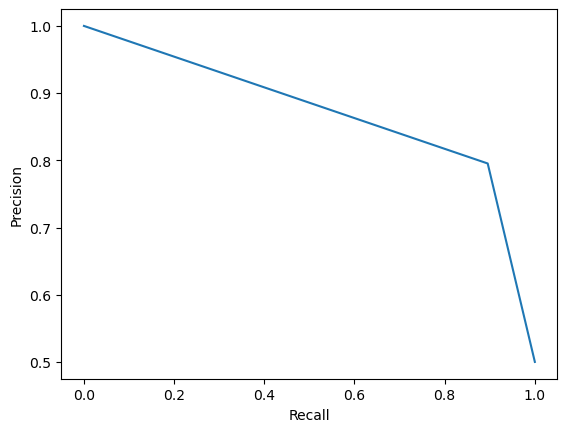

In [47]:
from sklearn.metrics import precision_recall_curve,roc_curve
precision, recall,thresholds  = precision_recall_curve(y_test,RFC.predict(X_test))
sns.lineplot(x = recall, y = precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

Text(0.5, 1.0, 'ROC curve')

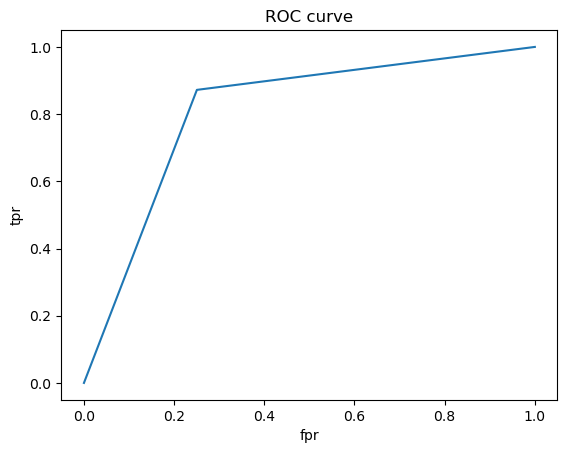

In [60]:
fpr, tpr, thresh = roc_curve(y_test,DTC_Grid_cv.predict(X_test))
sns.lineplot(x = fpr, y = tpr,)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

In [52]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.5,max_depth=2, random_state=42)
GBC.fit(X_train, y_train)

train_accuracy =  accuracy_score(y_train,GBC.predict(X_train))

print('train_accuracy = ',train_accuracy)
accuracyScore = cross_val_score(GBC,X_res,y_res,scoring='f1',cv=3)

print('accuracy_score = ',accuracyScore.mean())
confusion_matrix(y_test,GBC.predict(X_test))
print(classification_report(y_test,GBC.predict(X_test)))

train_accuracy =  0.8698118428334256
accuracy_score =  0.7782516938687926
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1549
           1       0.84      0.86      0.85      1549

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



In [56]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=600,random_state=42,learning_rate=0.5)

ada_clf.fit(X_train, y_train)

train_accuracy =  accuracy_score(y_train,ada_clf.predict(X_train))
test_accuracy =  accuracy_score(y_test,ada_clf.predict(X_test))
print('train_accuracy = ',train_accuracy)
print('test_accuracy = ',test_accuracy)
print(confusion_matrix(y_test,ada_clf.predict(X_test)))

print(classification_report(y_test,ada_clf.predict(X_test)))

c:\Users\momer\anaconda3\envs\Data_scince\lib\site-packages\sklearn\ensemble\_weight_boosting.py:539: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


train_accuracy =  0.8635860542335363
test_accuracy =  0.8495803744351195
[[1291  258]
 [ 208 1341]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1549
           1       0.84      0.87      0.85      1549

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



In [59]:
from xgboost import XGBClassifier


xgb = XGBClassifier(learning_rate = 0.5,n_estimators = 10)

param_grid = {

'max_depth': range(3, 10),

}



xgb_Grid_cv = GridSearchCV(estimator=xgb,
                          param_grid=param_grid,
                          scoring='f1',
                          cv=3)

xgb_Grid_cv.fit(X_train, y_train)

score = cross_val_score(xgb_Grid_cv,X_res,y_res,scoring='f1',cv=3)

print(xgb_Grid_cv.best_params_)
print('accuracy_score = ',score.mean())

train_accuracy =  accuracy_score(y_train,xgb_Grid_cv.predict(X_train))
test_accuracy =  accuracy_score(y_test,xgb_Grid_cv.predict(X_test))
print('train_accuracy = ',train_accuracy)
print('test_accuracy = ',test_accuracy)
confusion_matrix(y_test,xgb_Grid_cv.predict(X_test))

{'max_depth': 7}
accuracy_score =  0.8163054234047552
train_accuracy =  0.8832318760376314
test_accuracy =  0.8395739186571982


array([[1240,  309],
       [ 188, 1361]], dtype=int64)